<a href="https://colab.research.google.com/github/CaioPadoa/Projetos-DSNP-3.0/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [75]:
# importar os pacotes necessários]
!pip install scikit-plot -q
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('dark')

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [5]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

In [6]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
(df.isnull().sum()/df.shape[0])

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


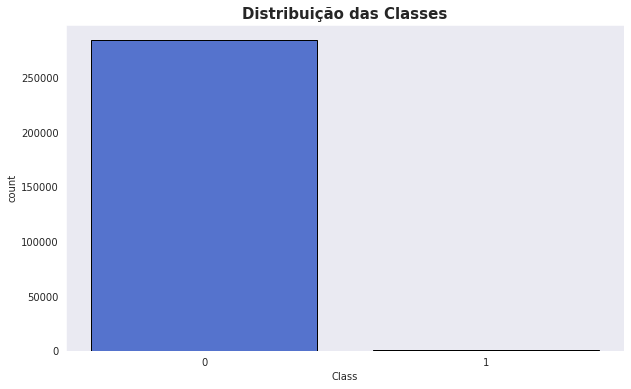

In [28]:
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

fig, ax = plt.subplots(figsize = (10, 6))
sns.countplot("Class", data = df, ax = ax, color = "royalblue", edgecolor = "black")
ax.set_title("Distribuição das Classes", fontweight = "semibold", fontsize = 15)
plt.plot();

Logo de cara, é possível perceber que os dados estão completamente desbalanceados. 

Considerando que apenas 0.17% do dataset é composto de fraudes, será extremamente difícil construir um modelo confiável. Para resolver essa questão, será necessário fazer um rebalancemaneot mais à frente.

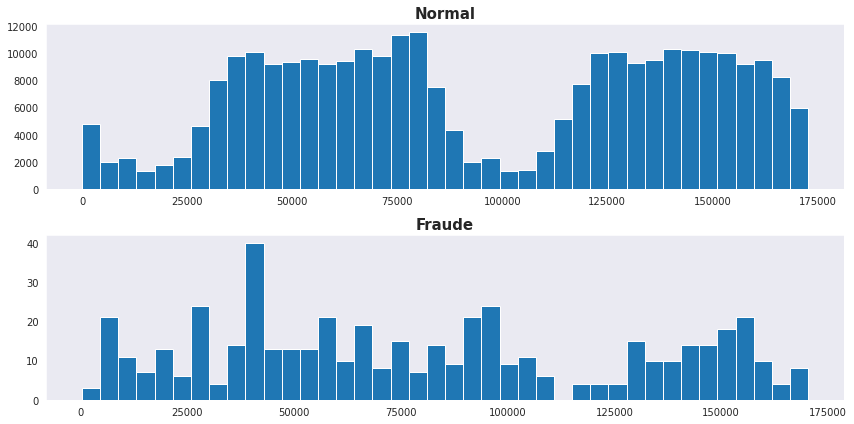

In [34]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))

ax1.hist(df.Time[df.Class == 0], bins = 40)
ax1.set_title("Normal", fontweight = "semibold", fontsize = 15)

ax2.hist(df.Time[df.Class == 1], bins = 40)
ax2.set_title("Fraude", fontweight = "semibold", fontsize = 15)

plt.tight_layout();

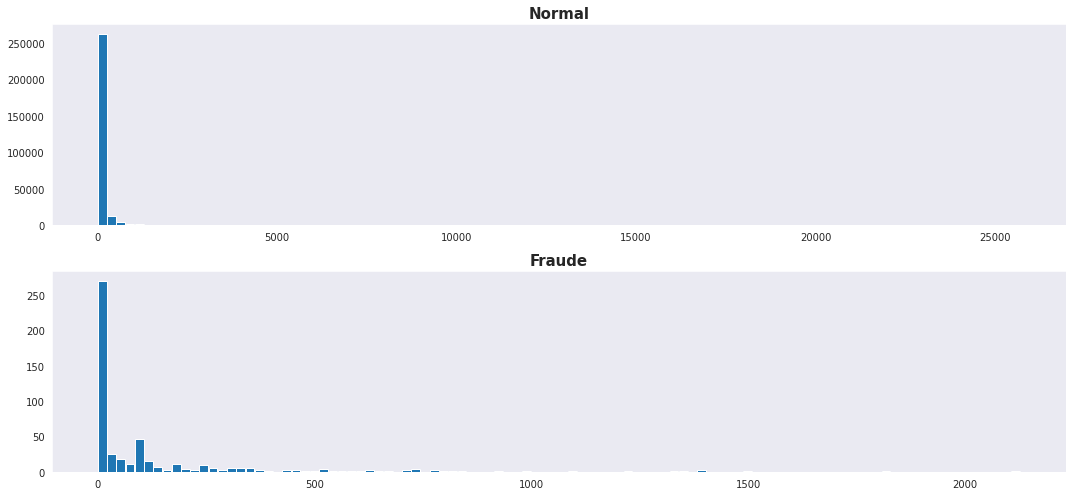

In [155]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 7))

ax1.hist(df.Amount[df.Class == 0], bins = 100, rwidth=0.95)
ax1.set_title("Normal", fontweight = "semibold", fontsize = 15)

ax2.hist(df.Amount[df.Class == 1], bins = 100, rwidth=0.95)
ax2.set_title("Fraude", fontweight = "semibold", fontsize = 15)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.tight_layout();

A partir destes histogramas, é possível identificar a diferença entre essas duas classes.

As transações normais claramente não possuem muitos outliers, enquanto as fraudulentas possuem vários.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


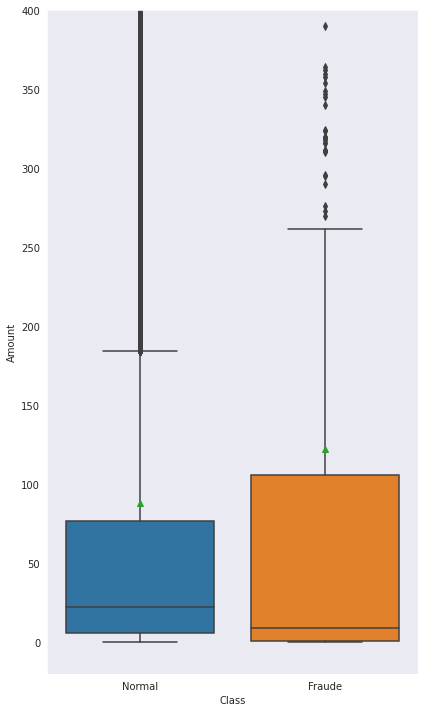

In [52]:
fig, ax = plt.subplots(figsize = (6, 10), sharex = True)

sns.boxplot(df.Class, df.Amount, showmeans = True, ax = ax)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout();

In [54]:
df[(df.Class == 1) & (df.Amount < 2000)]["Amount"].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

## Preparação dos Dados

Nesta etapa, nos preocuparemos, primeiramente, em padronizar os dados das variáveis `Time` e `Amount`.

Após isso, dividremos o dataset entre dois conjuntos:
* Treino
* Teste

Depois dessa etapa, iremos fazer o balanceamento de dados através da técnica de Random Undersampling


In [60]:
#Padronizando dados (Time e Amount)
df_clean = df.copy()

std_clear = StandardScaler()
df_clean["std_amount"] = std_clear.fit_transform(df_clean.Amount.values.reshape(-1, 1))
df_clean["std_time"] = std_clear.fit_transform(df_clean.Time.values.reshape(-1, 1))

df_clean.drop(["Time", "Amount"], axis = 1, inplace = True)

df_clean.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [61]:
#dividir entre treino e teste
X = df_clean.drop("Class", axis = 1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, shuffle = True)

0    369
1    369
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


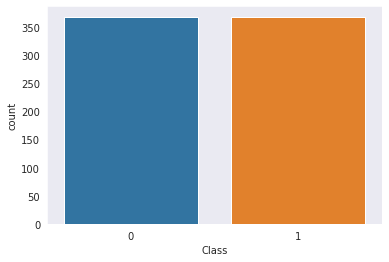

In [64]:
#balanceando dados
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print(pd.Series(y_rus).value_counts())

sns.countplot(y_rus)

Agora que os dados estão devidamente balanceados, é possível analisar corretamente uma Matriz de Correlação, calculada pelo R de Pearson.

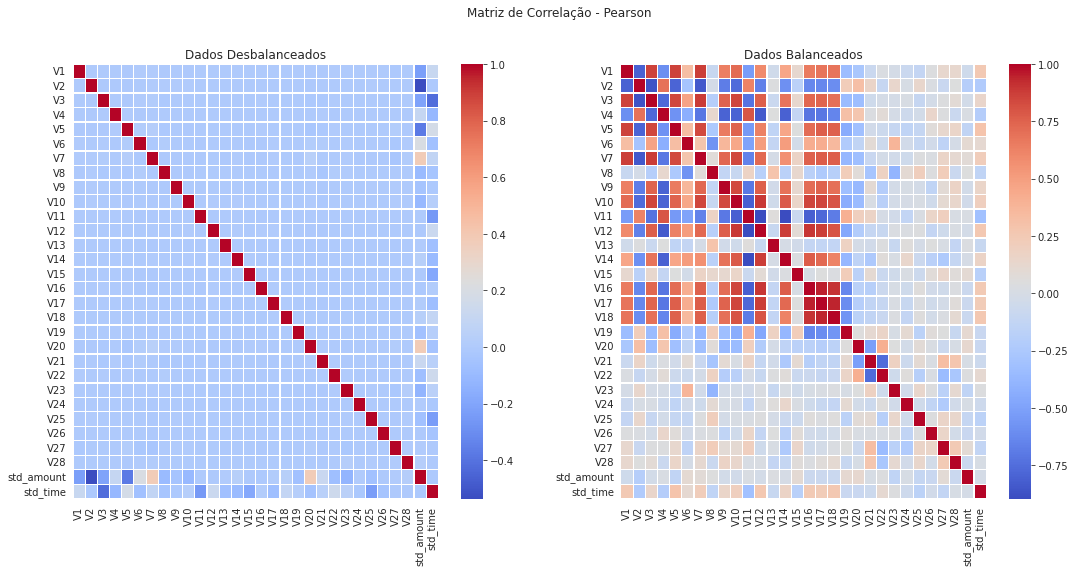

In [69]:
balanceados = pd.DataFrame(X_rus)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))
fig.suptitle("Matriz de Correlação - Pearson")

sns.heatmap(X_train.corr(), xticklabels = X_train.corr().columns, yticklabels = X_train.corr().columns ,linewidths = .1, cmap = "coolwarm", ax = ax1)
ax1.set_title("Dados Desbalanceados")

sns.heatmap(balanceados.corr(), xticklabels = X_train.corr().columns, yticklabels = X_train.corr().columns, linewidths = .1, cmap = "coolwarm", ax = ax2)
ax2.set_title("Dados Balanceados")

plt.show();

## Modelo de Machine Learning

Nesta etapa, serão construídos dois modelos de Machine Learning com os dados balanceados:

* Regressão Logística
* Árvore de Decisão

Após isso, iremos comparar qual modelo classificatório se saiu melhor nos testes de validação



### Regressão Logística

In [136]:
np.random.seed(2)

model = LogisticRegression()

model.fit(X_rus, y_rus)

y_pred = model.predict(X_test)
Y_prob = model.predict_proba(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9653    0.9822     71079
           1     0.0423    0.8862    0.0807       123

    accuracy                         0.9651     71202
   macro avg     0.5210    0.9257    0.5315     71202
weighted avg     0.9981    0.9651    0.9807     71202

Acurácia: 0.9651

AUC: 0.9257



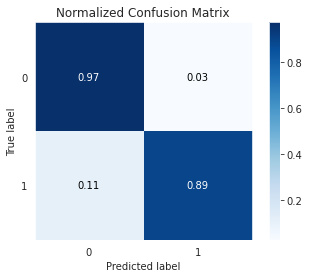

In [137]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True)

print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits = 4))

print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

### Árvore de Decisão

In [138]:
#2º Modelo - Árvore de Decisão
model2 = DecisionTreeClassifier(max_depth = 3, criterion = "entropy")
model2.fit(X_rus, y_rus)

y_pred = model2.predict(X_test)

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     71079
           1       0.02      0.89      0.04       123

    accuracy                           0.93     71202
   macro avg       0.51      0.91      0.50     71202
weighted avg       1.00      0.93      0.96     71202



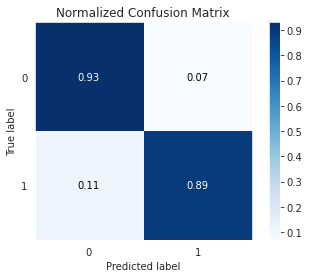

In [140]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True)

In [141]:
print("Acurácia: {}".format(accuracy_score(y_test, y_pred)))

Acurácia: 0.925971180584815


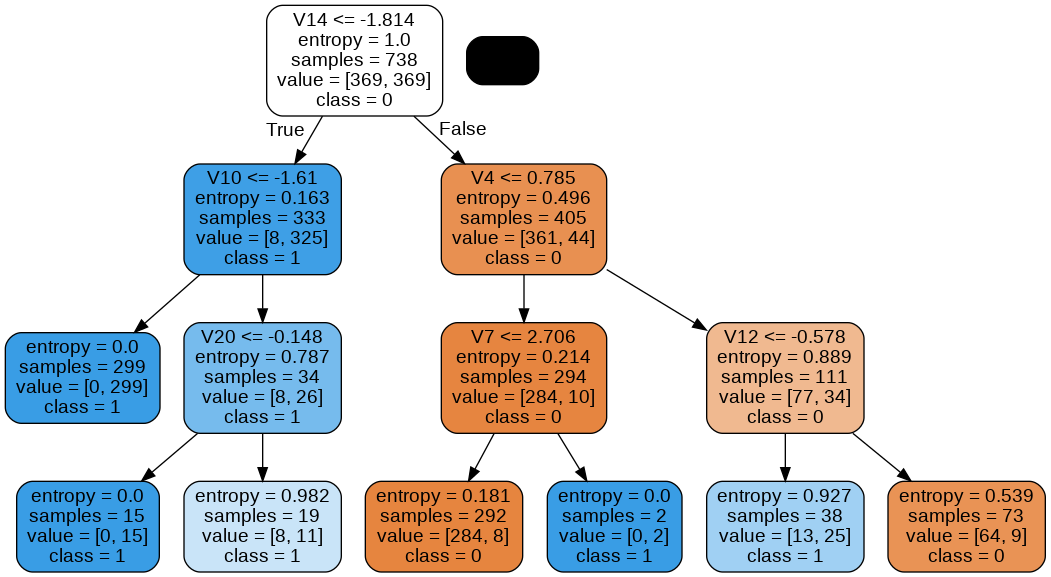

In [142]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(model2, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

# Fazendo Previsões no Conjunto de Teste

É como diz o ditado: treino é treino, jogo é jogo.

Agora é a hora de realmente testar nosso modelo para descobrir sua real eficiência. 

Para isso, iremos testar tanto o modelo de Regressão Logística quanto o de Árvore de Decisão em uma amostra do dataset padronizado.

In [143]:
test = df_clean.sample(frac=0.15, random_state=44)
test_clean = test.copy()

test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
243468,1.979337,0.064521,-1.150544,1.176325,0.060850,-0.815770,0.116726,-0.135087,0.133827,0.528709,...,0.948484,0.012945,-0.002948,0.228649,-0.442275,-0.004149,-0.064232,0,-0.349231,1.203042
199768,-0.639667,-0.585549,1.002483,-3.320925,0.566507,-0.341409,0.267005,-0.008496,1.658995,-1.755683,...,0.962796,-0.264811,0.200230,0.215350,-0.791793,-0.018760,-0.079976,0,-0.146328,0.806816
225021,-0.439191,1.437059,-0.703078,0.912932,1.480194,-0.252320,1.731726,-0.305094,-0.664281,0.037192,...,0.514022,-0.215383,0.589892,0.063616,-0.447611,0.421843,0.101781,0,-0.094753,1.037148
228573,-6.116767,4.807263,-3.578253,0.336068,-5.019864,-0.418749,-5.557093,2.739950,-0.313728,-0.982823,...,-0.077952,1.384585,0.485238,-1.660924,0.197454,-2.109592,-0.356306,0,-0.342355,1.068840
86358,-1.950262,-0.760342,0.654425,0.036263,1.088264,-1.491708,-0.353993,0.590658,-0.085243,-0.906863,...,-0.003087,-0.151562,0.091111,-0.177509,0.360846,-0.035207,-0.200370,0,-0.353229,-0.707901


### Teste - Regressão Logística

In [144]:
#Regressão Logística - Teste
X_val = test_clean.drop("Class", axis = 1)
y_val = test_clean["Class"] 

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9649    0.9820     42649
           1     0.0409    0.8889    0.0783        72

    accuracy                         0.9647     42721
   macro avg     0.5204    0.9269    0.5302     42721
weighted avg     0.9982    0.9647    0.9805     42721

Acurácia: 0.9647

AUC: 0.9269



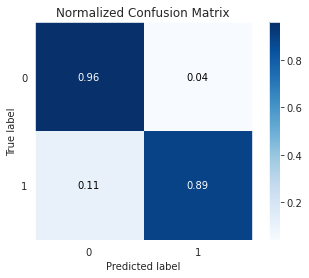

In [145]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize = True)

print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits = 4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

### Teste - Árvore de Decisão

In [146]:
X_val = test_clean.drop("Class", axis = 1)
y_val = test_clean["Class"] 

y_pred = model2.predict(X_val)
y_prob = model2.predict_proba(X_val)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9258    0.9614     42649
           1     0.0204    0.9167    0.0400        72

    accuracy                         0.9258     42721
   macro avg     0.5101    0.9212    0.5007     42721
weighted avg     0.9982    0.9258    0.9599     42721

Acurácia: 0.9258

AUC: 0.9212



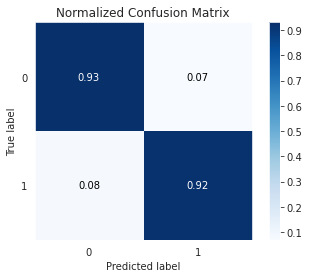

In [147]:
skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize = True)

print("Relatório de Classificação:\n", classification_report(y_val, y_pred, digits = 4))
print("Acurácia: {:.4f}\n".format(accuracy_score(y_val, y_pred)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_val, y_pred)))

## Conclusão

Ambos os modelos se saíram muito bem, com altíssima ecurácia e ótimos resultados na Matriz de Confusão.

Entretanto, o modelo de Regressão Logística se saiu ligeiramente superior, com uma acurácia global maior.

Esse resultado pode ser extremamente útil para empresas que lidam diariamente com transações de crédito. Um modelo que consiga classificar fraudes com alta acurácia é capaz de poupar milhões - para não falar bilhões - com auxílio de Inteligência Artificial!